In [1]:
print(__doc__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

Automatically created module for IPython interactive environment


In [2]:
def underline_key(phrase_u, phrase_nu):
    sp0, sp1 = "\033[1;;4m", "\033[1;;2m" 
    text_u = sp0+phrase_u+sp1+" "+phrase_nu
    print(text_u)

In [216]:
#df_data  = pd.read_pickle("./saved_variables/df_data")
X_train, X_test, y_train, y_test = pd.read_pickle('./saved_variables/X_y_train_test')
df_X, df_y, df_data = pd.read_pickle('saved_variables/df_X_y_data')
feature_names, class_names = pd.read_pickle('saved_variables/feature_class_names')

# Start of branch module


In [14]:
model = DecisionTreeClassifier(random_state=0)
path = model.cost_complexity_pruning_path(X_train, y_train)
#access return variables through dot notation
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [15]:
print(np.array(list(zip(ccp_alphas,impurities))))
underline_key("Length of ccp_alphas:", str(len(ccp_alphas)))
underline_key("Length of impurities:", str(len(impurities)))


[[0.         0.        ]
 [0.00226647 0.00453294]
 [0.00464743 0.01847522]
 [0.0046598  0.02313502]
 [0.0056338  0.02876883]
 [0.00704225 0.03581108]
 [0.00784194 0.04365302]
 [0.00911402 0.05276704]
 [0.01144366 0.0642107 ]
 [0.018988   0.0831987 ]
 [0.02314163 0.10634033]
 [0.03422475 0.14056508]
 [0.32729844 0.46786352]]
Length of ccp_alphas: 13
Length of impurities: 13


Text(0.5,1,'Total Impurity vs effective alpha for training set')

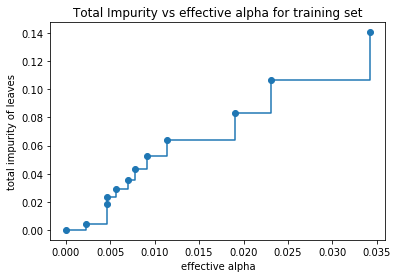

In [16]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [17]:
def add_to_list(list_a,new_item):
    list_a.append(new_item)

In [58]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, min_impurity_split=None, min_samples_split=2)
    clf.fit(X_train, y_train)
    #print(clf)
    add_to_list(clfs,clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.03422474765119576


In [19]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depths = [clf.tree_.max_depth for clf in clfs]

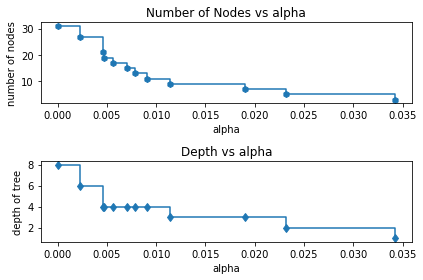

In [20]:
fig, ax = plt.subplots(2,1)
#Generate two plots, number of nodes , depth vs alpha
#First plot
ax[0].plot(ccp_alphas, node_counts, marker='h', drawstyle='steps-post')
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of Nodes vs alpha")
#Second plot
ax[1].plot(ccp_alphas, depths, marker='d', drawstyle='steps-post')
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [21]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
score_list_index = range(len(train_scores))

accuracy_gaps = []
for i in score_list_index:
    accuracy_gap = train_scores[i] - test_scores[i]
    accuracy_gaps.append(accuracy_gap)
    
#wont be ploted
accuracy_ratios = []
for i in score_list_index:
    accuracy_ratio = train_scores[i] / test_scores[i]
    accuracy_ratios.append(accuracy_ratio)

In [22]:
# Creating data frame from list for easier access
dataframe_data = [ccp_alphas, train_scores, test_scores, accuracy_gaps, accuracy_ratios]
scoring_columns = ["ccp_alphas","train_scores", "test_scores", "accuracy_gaps", "accuracy_ratios"]
df1 = pd.DataFrame(data = dataframe_data)
df2 = df1.T
df2.columns = scoring_columns
df2.head()

,ccp_alphas,train_scores,test_scores,accuracy_gaps,accuracy_ratios
0,0.000000,1.000000,0.881119,0.118881,1.134921
1,0.002266,0.997653,0.888112,0.109541,1.123341
2,0.004647,0.990610,0.916084,0.074526,1.081353
3,0.004660,0.988263,0.916084,0.072179,1.078791
4,0.005634,0.983568,0.916084,0.067484,1.073666


### Select minimum alpha as best alpha

In [23]:
#defining variables for print output
best_alpha_index = test_scores.index(max(test_scores))

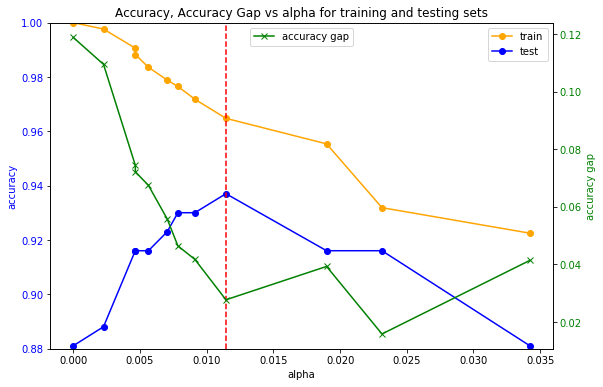

In [24]:
#Accuracy double plot
fig, ax1 = plt.subplots(figsize=(9,6))


ax1.set_ylim(0.88, 1)

ax1.set_xlabel('alpha')
ax1.set_ylabel('accuracy', color='blue')
ax1.set_title("Accuracy, Accuracy Gap vs alpha for training and testing sets")
ax1.plot(ccp_alphas, train_scores, marker='o', label='train', color='orange')
ax1.plot(ccp_alphas, test_scores, marker='o', label='test', color='blue')
plt.axvline(x=ccp_alphas[best_alpha_index], linestyle='--', color='red')
ax1.legend()
#fig.text(text='This is the figure title', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

ax2.set_ylabel('accuracy gap', color='green')
ax2.plot(ccp_alphas, accuracy_gaps, marker='x', label='accuracy gap',  color='green')
ax2.legend(loc='upper center')
ax2.tick_params(axis='y', labelcolor='green')


# Selected Tree Information - final product?

In [64]:
best_alpha = df2['ccp_alphas'][best_alpha_index]
best_alpha_test_score = df2['test_scores'][best_alpha_index]
best_alpha_accuracy_gap = df2['accuracy_gaps'][best_alpha_index]
best_alpha_accuracy_ratio = df2['accuracy_ratios'][best_alpha_index]

best_x, best_y, best_g, best_r = str(best_alpha), str(best_alpha_test_score), str(best_alpha_accuracy_gap), str(best_alpha_accuracy_ratio)

underline_key("Best alpha:", best_x)
underline_key("Best alpha's test score", best_y)
underline_key("Best alpha's accuracy gap:", best_g)
underline_key("Best alpha's accuracy ratio:", best_r)

Best alpha: 0.011443661971830986
Best alpha's test score 0.9370629370629371
Best alpha's accuracy gap: 0.02772579533142916
Best alpha's accuracy ratio: 1.0295879756148834


A training accuracy that is subjectively far higher than test accuracy indicates over-fitting. - Andrew Ng

In [26]:
underline_key("Selected Decision Tree Parameters", str(clfs[best_alpha_index]))       

Selected Decision Tree Parameters DecisionTreeClassifier(ccp_alpha=0.011443661971830986, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')


In [217]:
from sklearn.tree import export_text

#SET PARAMETERS!!!!! FEATURE NAMES, CLASS NAMES
r = export_text(clfs[best_alpha_index], feature_names=feature_names, max_depth=100, spacing=3, show_weights='True')
underline_key("Selected Decision Tree Structure","")
print(r)

Selected Decision Tree Structure 
|--- concave_points_mean <= 0.05
|   |--- area_worst <= 952.90
|   |   |--- weights: [7.00, 245.00] class: 1
|   |--- area_worst >  952.90
|   |   |--- weights: [6.00, 2.00] class: 0
|--- concave_points_mean >  0.05
|   |--- area_worst <= 785.80
|   |   |--- texture_worst <= 23.74
|   |   |   |--- weights: [0.00, 14.00] class: 1
|   |   |--- texture_worst >  23.74
|   |   |   |--- weights: [13.00, 3.00] class: 0
|   |--- area_worst >  785.80
|   |   |--- weights: [133.00, 3.00] class: 0



## Exporting
### plot tree method - straight to inline vizualization
https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
### .dot method - saved file that is called upon later to create vizualization
https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
### export text method - inline text
### export to png

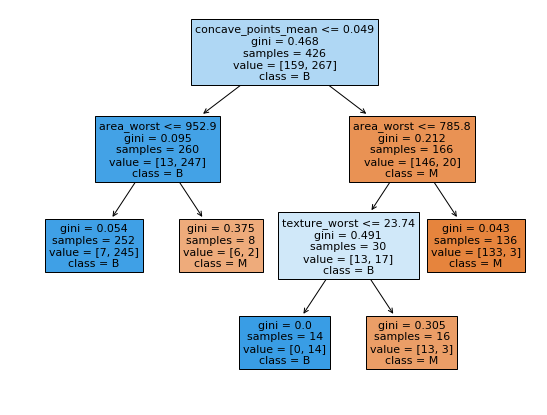

In [55]:
#version 1 from https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py
from sklearn.tree import plot_tree

plt.figure(figsize=(9,7))
clf_selected = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alphas[best_alpha_index])
clf_selected.fit(X_train, y_train)

plot_tree(clf_selected, feature_names=feature_names, class_names=class_names, filled=True,
          node_ids=False, rotate=False, rounded=False, fontsize=11)
plt.show()

for help https://bobswift.atlassian.net/wiki/spaces/GVIZ/pages/131924165/Graphviz+installation

In [103]:
iris = load_iris()
iris.data[:, [1,2]]

array([[3.5, 1.4],
       [3. , 1.4],
       [3.2, 1.3],
       [3.1, 1.5],
       [3.6, 1.4],
       [3.9, 1.7],
       [3.4, 1.4],
       [3.4, 1.5],
       [2.9, 1.4],
       [3.1, 1.5],
       [3.7, 1.5],
       [3.4, 1.6],
       [3. , 1.4],
       [3. , 1.1],
       [4. , 1.2],
       [4.4, 1.5],
       [3.9, 1.3],
       [3.5, 1.4],
       [3.8, 1.7],
       [3.8, 1.5],
       [3.4, 1.7],
       [3.7, 1.5],
       [3.6, 1. ],
       [3.3, 1.7],
       [3.4, 1.9],
       [3. , 1.6],
       [3.4, 1.6],
       [3.5, 1.5],
       [3.4, 1.4],
       [3.2, 1.6],
       [3.1, 1.6],
       [3.4, 1.5],
       [4.1, 1.5],
       [4.2, 1.4],
       [3.1, 1.5],
       [3.2, 1.2],
       [3.5, 1.3],
       [3.6, 1.4],
       [3. , 1.3],
       [3.4, 1.5],
       [3.5, 1.3],
       [2.3, 1.3],
       [3.2, 1.3],
       [3.5, 1.6],
       [3.8, 1.9],
       [3. , 1.4],
       [3.8, 1.6],
       [3.2, 1.4],
       [3.7, 1.5],
       [3.3, 1.4],
       [3.2, 4.7],
       [3.2, 4.5],
       [3.1,

In [104]:
df_X_list = df_X.values.tolist()
print(type(df_X_list))
df_X_list[:,2]

<class 'list'>


TypeError: list indices must be integers or slices, not tuple

In [107]:
print(df_X.values)
ds_x = df_X.values[:,[1,2]]

#used in later part of loop
ds_x[:,0]


[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


array([10.38, 17.77, 21.25, 20.38, 14.34, 15.7 , 19.98, 20.83, 21.82,
       24.04, 23.24, 17.89, 24.8 , 23.95, 22.61, 27.54, 20.13, 20.68,
       22.15, 14.36, 15.71, 12.44, 14.26, 23.04, 21.38, 16.4 , 21.53,
       20.25, 25.27, 15.05, 25.11, 18.7 , 23.98, 26.47, 17.88, 21.59,
       21.72, 18.42, 25.2 , 20.82, 21.58, 21.35, 24.81, 20.28, 21.81,
       17.6 , 16.84, 18.66, 14.63, 22.3 , 21.6 , 16.34, 18.24, 18.7 ,
       22.02, 18.75, 18.57, 21.59, 19.31, 11.79, 14.88, 20.98, 22.15,
       13.86, 23.84, 23.94, 21.01, 19.04, 17.33, 16.49, 21.31, 14.64,
       24.52, 15.79, 16.52, 19.65, 10.94, 16.15, 23.97, 18.  , 20.97,
       15.86, 24.91, 26.29, 15.65, 18.52, 21.46, 24.59, 21.8 , 15.24,
       24.02, 22.76, 14.76, 18.3 , 19.83, 23.03, 17.84, 19.94, 12.84,
       19.77, 24.98, 13.43, 20.52, 19.4 , 19.29, 15.56, 18.33, 18.54,
       19.67, 21.26, 16.99, 20.76, 19.65, 20.19, 15.83, 21.53, 15.76,
       16.67, 22.91, 20.01, 10.82, 17.12, 20.2 , 10.89, 16.39, 17.21,
       24.69, 18.91,

In [123]:

print(feature_names[[2,3][1]])

print([1,2][0])

area_mean
1


Automatically created module for IPython interactive environment


MemoryError: 

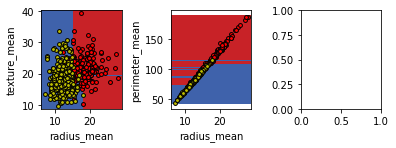

In [124]:
#this can take from permutation feature selcetion notebook
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

#this iterates pariidx as index? and pair as small list in the large list in reference to columns in dataset
#for future insert combonation of [x_column, y_column]
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # like said above, pair is used to select appropriate columns in dataset where : is selecting all rows
    X = df_X.values[:, pair]
    y = df_y

    # Train
    clf = DecisionTreeClassifier().fit(X, y)
    
    # Plot the decision boundary
    #plt.subplot(nrows, ncols, index)
    #pairidx is a index number from above to index small list out of large list
    plt.subplot(2, 3, pairidx + 1)

    # [:,] refers to the first out of two columns with all rows
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #creates the granualarity of visual plot
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    # makes layout of visualization to have form factor
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    # ravel flattens array aka turn a list of lists into one continous list
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #generate background rectangles
        #X and Y must both be 2-D with the same shape as Z (e.g. created via numpy.meshgrid),
            #or they must both be 1-D such that len(X) == M 
            #is the number of columns in Z and len(Y) == N is the number of rows in Z.
            # Z is the height values over which the contour is drawn.
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(feature_names[pair[0]])
    plt.ylabel(feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=feature_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

# Partial dependence plot

In [73]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import plot_partial_dependence

X, y = make_hastie_10_2(random_state=0)
clf = clfs[best_alpha_index]
features = [0, 1, (0, 1)]
plot_partial_dependence(clf, features, X=X_train) 

#partial_dependence(gb, features=[0], X=X, percentiles=(0, 1), 
#grid_resolution=2) # doctest: +SKIP


TypeError: plot_partial_dependence() got multiple values for argument 'X'

# Support Module

In [128]:
print(__doc__)
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
from scipy.cluster import hierarchy

import sklearn
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

Automatically created module for IPython interactive environment


In [144]:
clf = RandomForestClassifier(random_state=42, min_impurity_split=None, min_samples_split=2)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

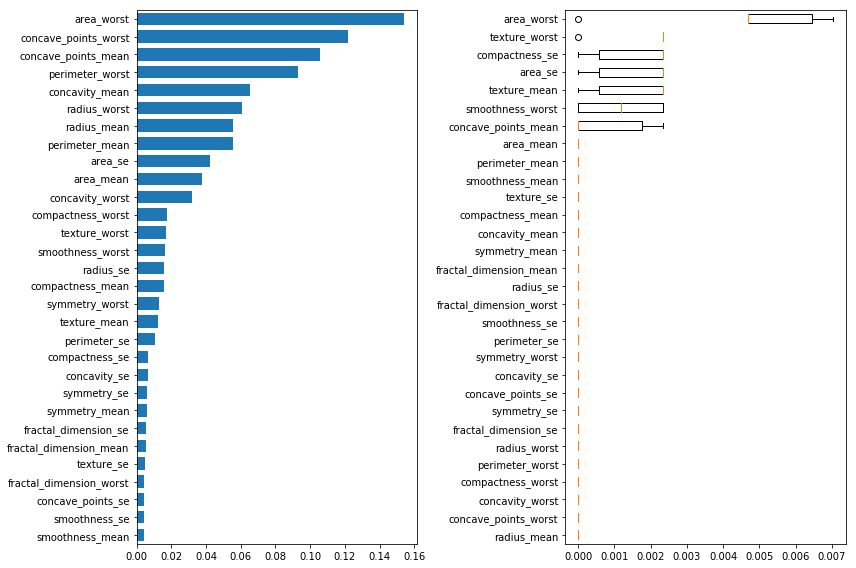

In [145]:
result = permutation_importance(clf, X_train, y_train, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices,
         clf.feature_importances_[tree_importance_sorted_idx], 
         height=0.7)
ax1.set_yticklabels(np.array(feature_names)[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(clf.feature_importances_)))
ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=np.array(feature_names)[perm_sorted_idx])
fig.tight_layout()
plt.show()

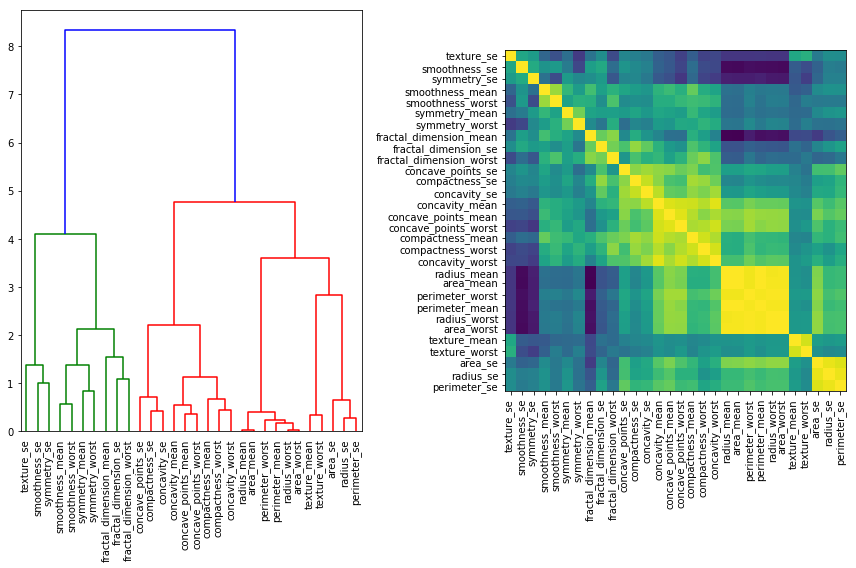

In [160]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))



#creating correlation matrix based on spearman;s coeffiecient
    #https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient
corr = spearmanr(df_X).correlation
#performing ward's linkage on a condense distance matrix. Ward variance minimization algorithm.
    #https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.ward.html
corr_linkage = hierarchy.ward(corr)
#takes in linkage matrix encoding provided by a linkage function like ward
#plots dendrogram
dendro = hierarchy.dendrogram(corr_linkage, labels=feature_names, ax=ax1,
                              leaf_rotation=90)
dendro_idx = np.arange(0, len(dendro['ivl']))

ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
#set numerical increments from list of ids
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
#call upon labels in dendro by iv1 to set onto xticks
ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
ax2.set_yticklabels(dendro['ivl'])
fig.tight_layout()
plt.show()

In [214]:
# creates flat clusters from hierarcal clustering created by a linkage matrix
    #second argument is the threshold to build clusters
cluster_ids = hierarchy.fcluster(corr_linkage, 1, criterion='distance')
cluster_id_to_feature_ids = defaultdict(list)
#idx is the index while cluster_id is a list of integers form above
    #appending standard index to a newly created dictionary
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
#calls upon the first value for each set of lists in the dictionary of cluster_id_to_feature_is
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

X_train_sel = X_train.iloc[:, selected_features]
X_test_sel = X_test.iloc[:, selected_features]

print(cluster_ids)
print("----------------------------")
print(cluster_id_to_feature_ids)
print("----------------------------")
print(cluster_id_to_feature_ids.values())
print("----------------------------")
print("v[0] for v in citfi: "+str(selected_features))

[12 13 12 12  4 11 10 10  5  8 14  3 14 14  1  9  9  9  2  6 12 13 12 12
  4 11 11 10  5  7]
----------------------------
defaultdict(<class 'list'>, {12: [0, 2, 3, 20, 22, 23], 13: [1, 21], 4: [4, 24], 11: [5, 25, 26], 10: [6, 7, 27], 5: [8, 28], 8: [9], 14: [10, 12, 13], 3: [11], 1: [14], 9: [15, 16, 17], 2: [18], 6: [19], 7: [29]})
----------------------------
dict_values([[0, 2, 3, 20, 22, 23], [1, 21], [4, 24], [5, 25, 26], [6, 7, 27], [8, 28], [9], [10, 12, 13], [11], [14], [15, 16, 17], [18], [19], [29]])
----------------------------
v[0] for v in citfi: [0, 1, 4, 5, 6, 8, 9, 10, 11, 14, 15, 18, 19, 29]


In [215]:
#n_estimators is how many trees in the forest
clf_sel = RandomForestClassifier(n_estimators=100, random_state=42)
clf_sel.fit(X_train_sel, y_train)
print("Accuracy on test data with features removed: {:.2f}".format(clf_sel.score(X_test_sel, y_test)))

Accuracy on test data with features removed: 0.94
